In [45]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

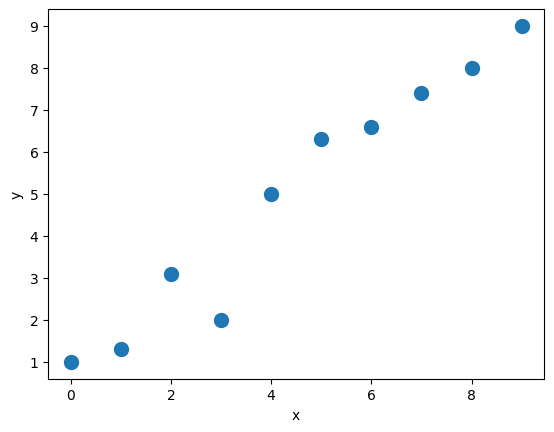

In [46]:
X_train = np.arange(10, dtype=np.float32).reshape(10, 1)
y_train = np.array(
    [1.0, 1.3, 3.1, 2.0, 5.0, 
     6.3, 6.6, 7.4, 8.0, 9.0], 
    dtype="float32"
)

plt.plot(X_train, y_train, "o", markersize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [47]:
X_mean = X_train.mean()
X_std = X_train.std()

X_train_norm = (X_train - X_mean) / X_std

X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1

train_dl = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

In [48]:
torch.manual_seed(1)
weight = torch.randn(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)


def model(xb):
    return xb @ weight + bias


def loss_fn(input, target):
    return (input - target).pow(2).mean()


learning_rate = 1e-3
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()  # backpropagation to update the weights
        


        with torch.no_grad():  # no gradient calculation
            weight -= learning_rate * weight.grad
            bias -= learning_rate * bias.grad
            weight.grad.zero_()  # reset the gradient to zero
            bias.grad.zero_()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 45.0782
Epoch 10  Loss 26.4366
Epoch 20  Loss 1.5918
Epoch 30  Loss 14.1307
Epoch 40  Loss 11.6038
Epoch 50  Loss 6.3084
Epoch 60  Loss 0.6349
Epoch 70  Loss 3.1374
Epoch 80  Loss 1.9999
Epoch 90  Loss 0.3133
Epoch 100  Loss 0.7653
Epoch 110  Loss 1.0039
Epoch 120  Loss 0.0235
Epoch 130  Loss 0.5176
Epoch 140  Loss 0.0759
Epoch 150  Loss 1.8789
Epoch 160  Loss 0.0008
Epoch 170  Loss 0.0866
Epoch 180  Loss 0.0646
Epoch 190  Loss 0.0011


In [49]:
print("Окончательные параметры:", weight.item(), bias.item())

Окончательные параметры: 2.6696107387542725 4.879678249359131


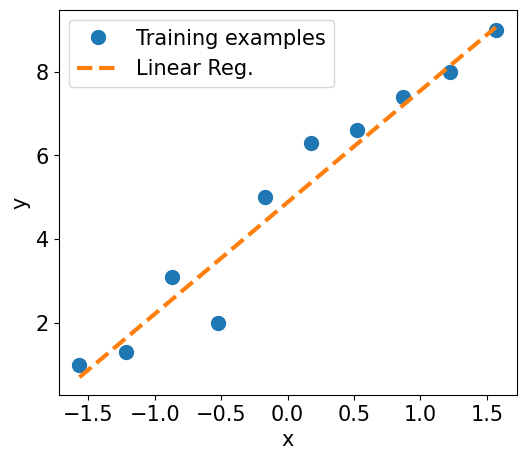

In [50]:
X_test = np.linspace(0, 9, num=100, dtype="float32").reshape(-1, 1)
X_test_norm = (X_test - X_mean) / X_std

X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()




fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)



---
### Реализация функции потерь и обновления весов через встроенные модули


In [51]:
import torch.nn as nn

In [52]:
loss_fn = nn.MSELoss(reduction="mean")

In [53]:
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

In [54]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [55]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    if epoch % log_epochs == 0:
        print(f"Эпохи {epoch}  потери {loss.item():.4f}")

Эпохи 0  потери 24.6684
Эпохи 10  потери 29.1377
Эпохи 20  потери 20.9207
Эпохи 30  потери 0.1257
Эпохи 40  потери 12.4922
Эпохи 50  потери 1.7845
Эпохи 60  потери 7.6425
Эпохи 70  потери 2.5606
Эпохи 80  потери 0.0157
Эпохи 90  потери 0.7548
Эпохи 100  потери 0.8412
Эпохи 110  потери 0.4923
Эпохи 120  потери 0.0823
Эпохи 130  потери 0.0794
Эпохи 140  потери 0.0891
Эпохи 150  потери 0.0973
Эпохи 160  потери 0.1043
Эпохи 170  потери 0.1103
Эпохи 180  потери 0.0009
Эпохи 190  потери 0.0764


In [56]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6496422290802 4.87706995010376


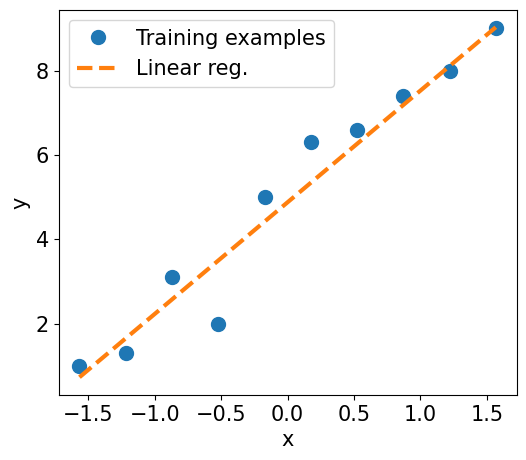

In [57]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm)


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach().numpy(), y_pred.detach().numpy(), '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('ch12-linreg-2.pdf')

plt.show()

---
#### Многослойный перцептрон классификатор

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [59]:
iris = load_iris()
X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, test_size=1.0 / 3
)


In [60]:
X_mean = X_train.mean()
X_std = X_train.std()

X_train_norm = (X_train - X_mean) / X_std
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

X_test_norm = (X_test - X_mean) / X_std
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

torch.manual_seed(1)
batch_size = 2
train_ds = TensorDataset(X_train_norm, y_train)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)


train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [61]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)

        return x

In [62]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [63]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

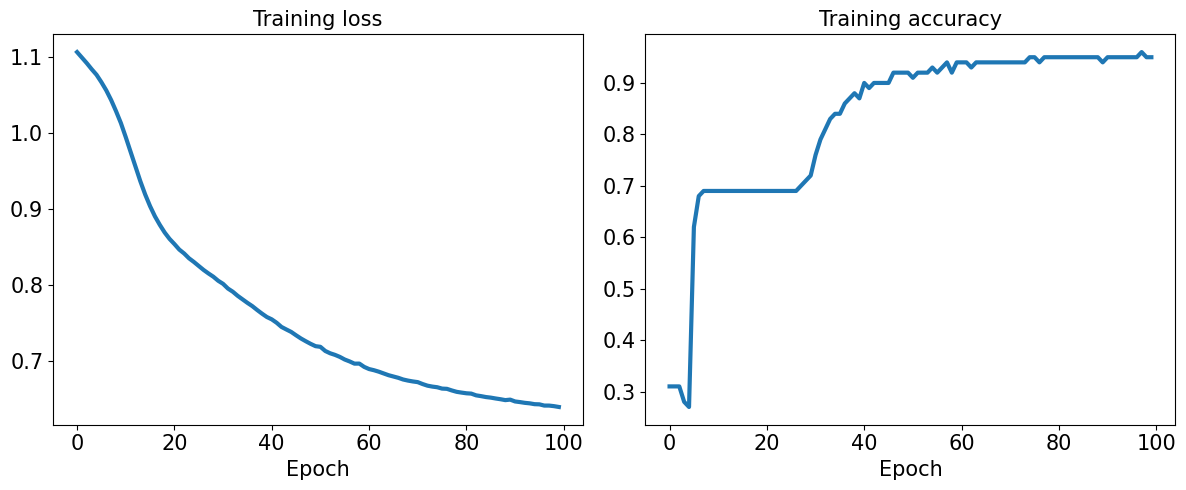

In [64]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

In [65]:
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [66]:
path = "./data/iris_classif.pt"
torch.save(model, path)

In [68]:
model_new = torch.load(path, weights_only=False)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [69]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800
